# Importing Libraries

In [1]:
# import contractions library.
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
# %load_ext nb_black

In [3]:
# library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

In [4]:
# import Regex, string and unicodedata.
import re, string, unicodedata

import contractions

In [5]:
# import BeautifulSoup.
from bs4 import BeautifulSoup

# import Natural Language Tool-Kit.
import nltk

In [6]:
# download Stopwords.
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
# import stopwords.
from nltk.corpus import stopwords

# import Tokenizer.
from nltk.tokenize import word_tokenize, sent_tokenize

In [8]:
# library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [9]:
# import wordcloud
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud

In [10]:
# remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [11]:
# to get diferent metric scores
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    confusion_matrix,classification_report,
    f1_score,
    precision_score,
    precision_recall_fscore_support
)

In [12]:
# import vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
# import rfc and cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [14]:
# import word prepocessors
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

Loading the dataset

In [15]:
df = pd.read_csv('/content/Tweets.csv')

In [16]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [17]:
texts = [[word.lower() for word in text.split()] for text in df]

In [18]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# Observations:
There are 15 columns in the dataset. Half of the columns have null values. Considering both dependent and independent variables not having any null values, we will not do any null value processing. Most columns in the dataset are of object type. airline_sentiment is our dependent / target variable. text column is our independent variable that we will use for analysis. All other columns will be dropped at a later stage.

In [20]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [21]:
df.isnull().sum() / len(df) * 100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

# Data Visualization

<Axes: >

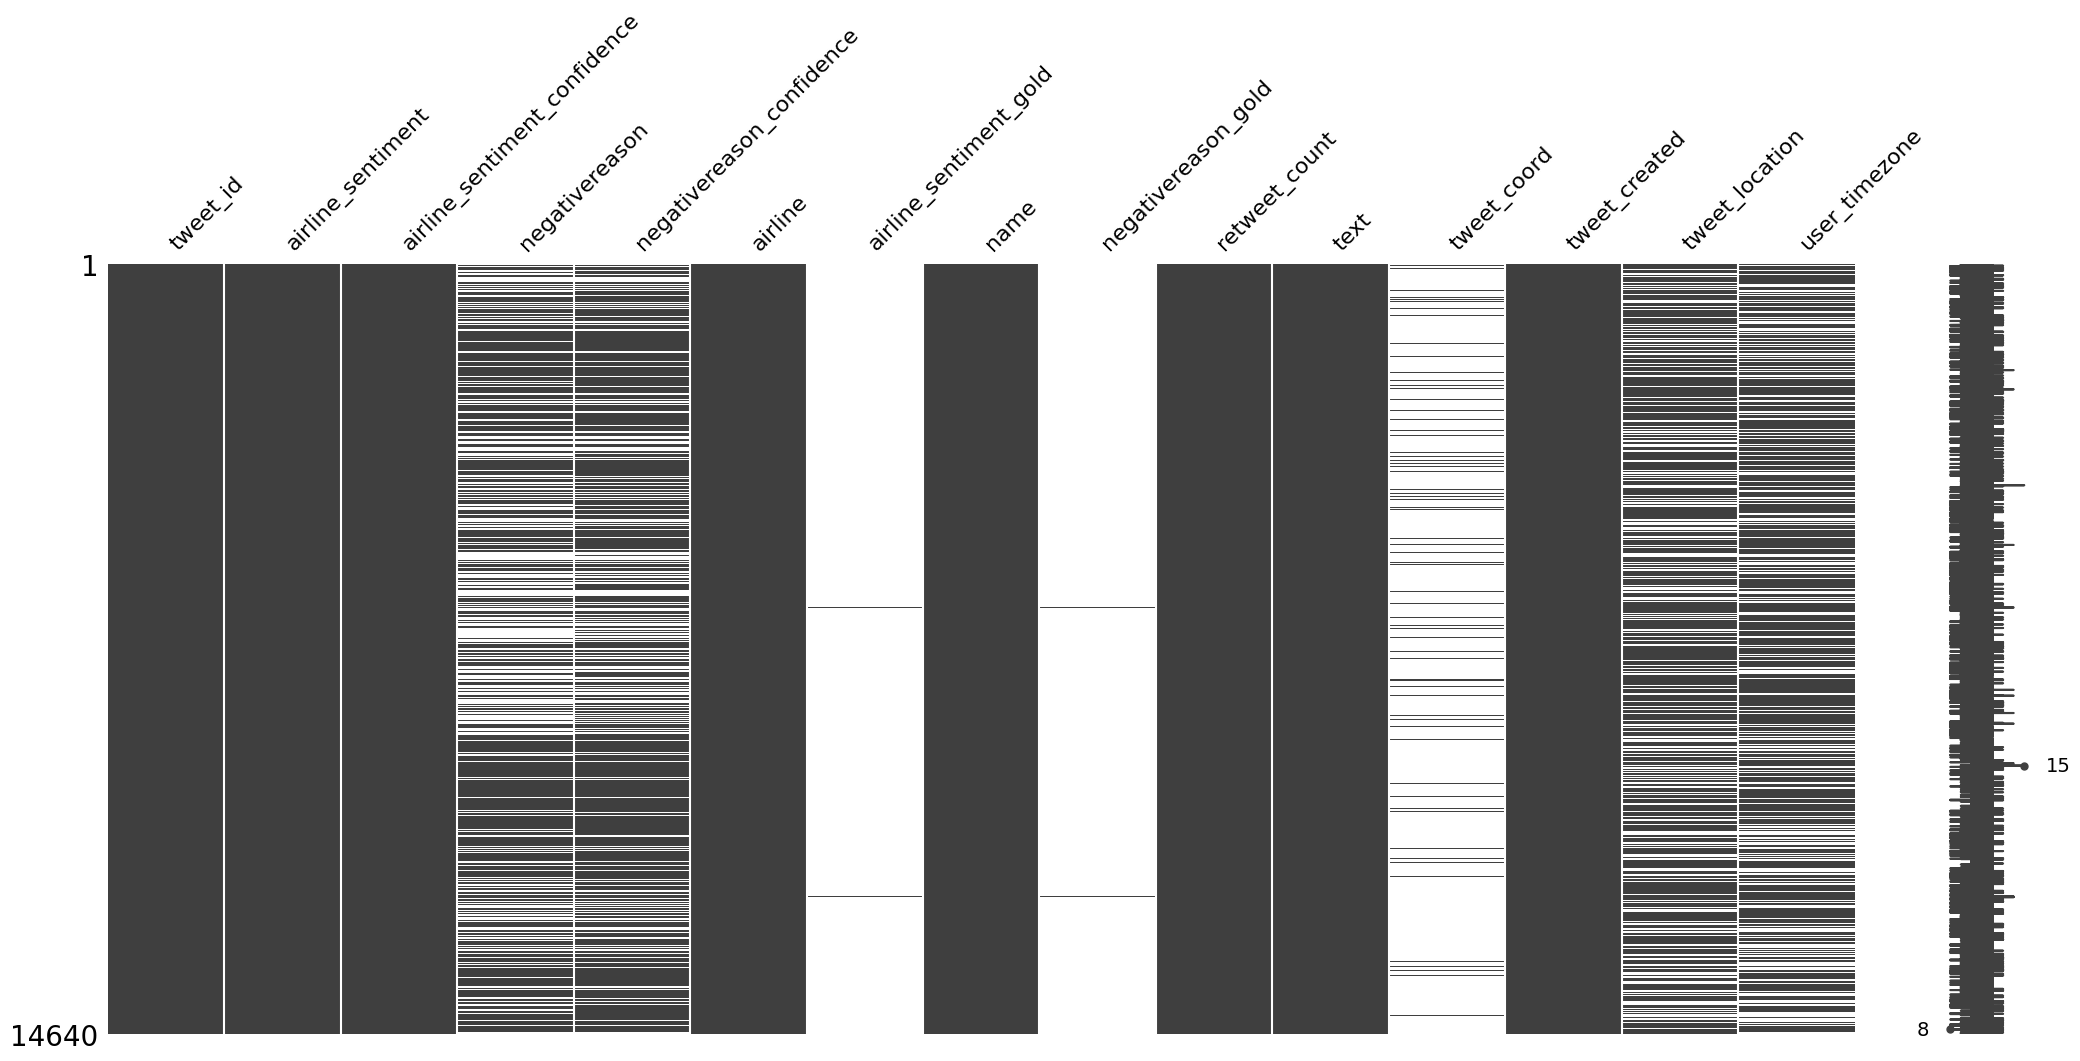

In [22]:
msno.matrix(df)

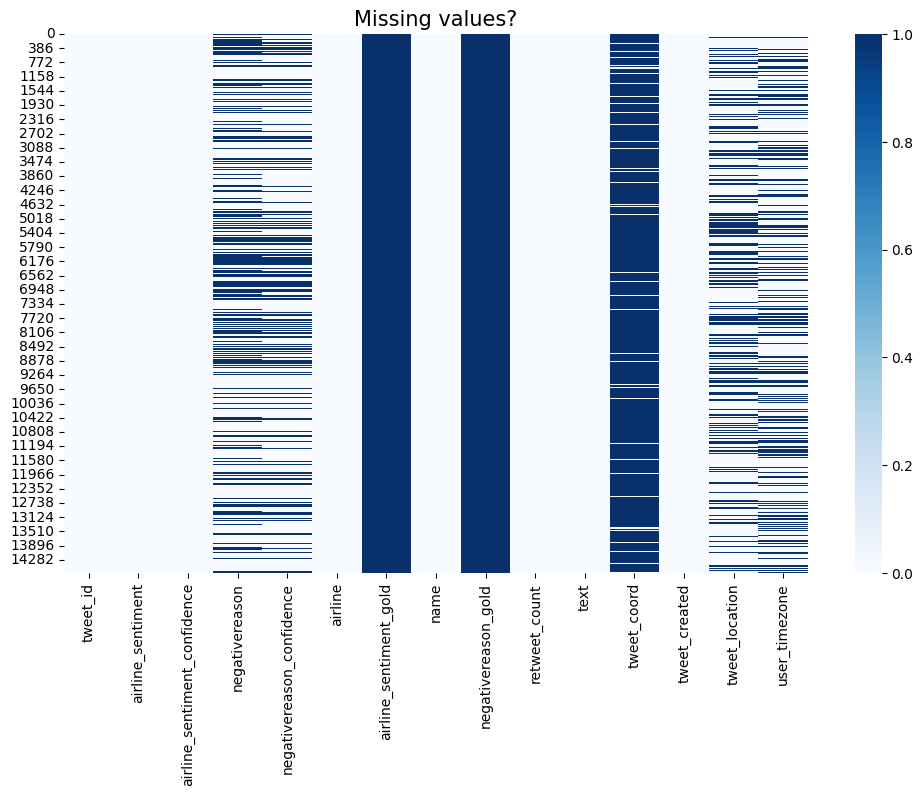

In [23]:
 #Visualization of missing value using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Blues")
plt.title("Missing values?", fontsize = 15)
plt.show()

**Interestingly, the only non-null values of the _gold columns seems to be the same entries for the most part. Meanwhile, there is some but not total overlap between location and timezone in terms of missing values.**

In [24]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

airline_sentiment_gold, negativereason_gold have more than 99% missing data And tweet_coord have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [30]:
del df["tweet_coord"]

In [31]:
del df["airline_sentiment_gold"]
del df["negativereason_gold"]

In [32]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [34]:
freq = df.groupby("negativereason").size()

**we can't fill it will affect in bad way for example we have positive reviwe and we fill the values with mode that means with Customer Service Issue it is missmatch and can be affect on train model so we keep the data as it is.**

In [35]:
# Checking duplicates
df.duplicated().sum()

39

In [36]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [37]:
df.duplicated().sum()

0

In [38]:
df.sample(n = 10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
2415,569218838190907393,positive,0.6487,NaN,0.0000,United,marynevis,0,@united They finally gave in a let him on. Aft...,2015-02-21 11:35:21 -0800,"Beautiful Stockton, CA",Pacific Time (US & Canada)
1069,569937143314849792,negative,1.0000,Damaged Luggage,0.6650,United,raulcordenillo,0,@united I will do delayed baggage claim when I...,2015-02-23 11:09:38 -0800,"Stockholm, Sweden",Stockholm
55,569996412286582784,negative,0.6939,Flight Booking Problems,0.6939,Virgin America,murphicus,0,@VirginAmerica hi! i'm so excited about your $...,2015-02-23 15:05:09 -0800,"new york, new york",Eastern Time (US & Canada)
293,568840560347373569,positive,1.0000,NaN,NaN,Virgin America,polaroidmisha,0,@VirginAmerica would love to do more for virgi...,2015-02-20 10:32:12 -0800,San Francisco,Pacific Time (US & Canada)
983,569976131748823040,negative,1.0000,Late Flight,0.6625,United,pjmartin44,0,@united how can your app show arriving aircraf...,2015-02-23 13:44:34 -0800,NaN,Eastern Time (US & Canada)
8786,567848171155496960,negative,0.6551,Can't Tell,0.3449,Delta,Nickymkirk,0,@JetBlue ticket issued whilst delivering your ...,2015-02-17 16:48:48 -0800,Dorado,NaN
6325,568055480226066434,negative,1.0000,Customer Service Issue,1.0000,Southwest,luvthispayne,0,@SouthwestAir So today I call into Customer Se...,2015-02-18 06:32:35 -0800,Somewhere over the rainbow.,Atlantic Time (Canada)
1223,569878139003740163,negative,1.0000,Customer Service Issue,0.3463,United,rissels,0,@united 's new #flierfriendly is garbage. Just...,2015-02-23 07:15:10 -0800,NaN,Central Time (US & Canada)
14601,569592830307508224,negative,1.0000,Late Flight,0.7123,American,Jess_JCW,0,@AmericanAir .....and they waited 5 hours in a...,2015-02-22 12:21:27 -0800,London,London
7354,569648229295329280,positive,1.0000,NaN,NaN,Delta,Scott66Ash,0,@JetBlue thanks for the response. We are hopeful.,2015-02-22 16:01:36 -0800,NaN,Atlantic Time (Canada)


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14601.0,5.692156e+17,7.782706e+14,5.675883e+17,5.685581e+17,5.694720e+17,5.698884e+17,5.703106e+17
airline_sentiment_confidence,14601.0,8.999022e-01,1.629654e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10501.0,6.375749e-01,3.303735e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14601.0,8.280255e-02,7.467231e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


# Exploratory Data Analysis(EDA)

In [40]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
name                             7701
retweet_count                      18
text                            14427
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

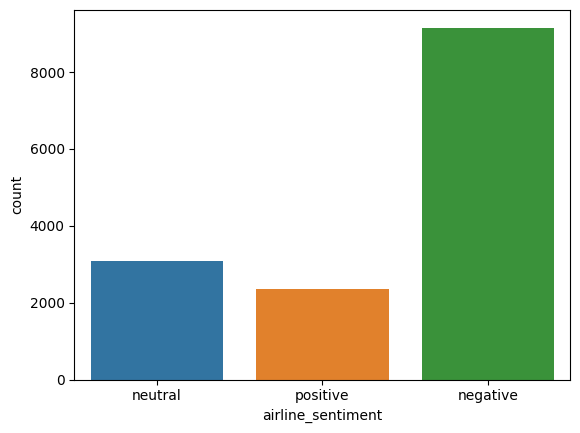

In [42]:
ax = sns.countplot(x = "airline_sentiment", data = df)

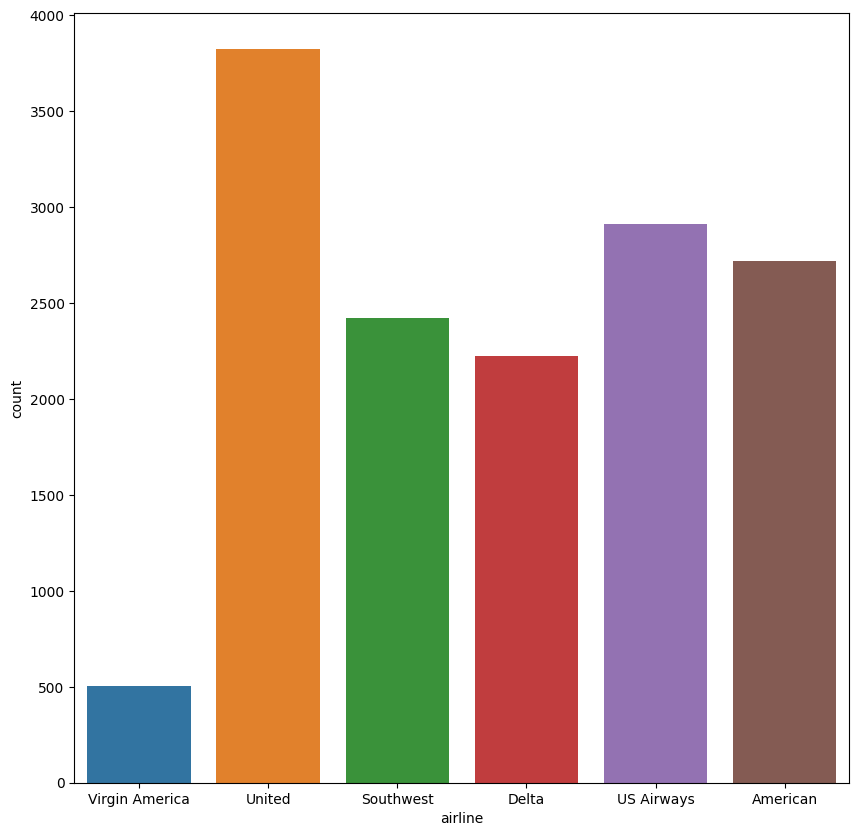

In [44]:
plt.figure(figsize = (10, 10))
ax = sns.countplot(x = "airline", data = df)

** Stacked bar chart to show the distribution of reviews per company**

In [46]:
import plotly.graph_objects as go
crosstab_sentiments=pd.crosstab(df.airline, df.airline_sentiment)
companies=list(crosstab_sentiments.index)

fig = go.Figure(data=[
    go.Bar(name=col_name, x=companies, y=list(crosstab_sentiments[col_name]))
for col_name in list(crosstab_sentiments.columns)])
# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Sentiment distribution per company',
                  yaxis=dict(title='Sentiment distribution'),
                 xaxis=dict(title='Companies'))
fig.show()

**Stacked bar chart to show negative reasons distributions per company**

In [47]:
crosstab_neg_reasons = pd.crosstab(df["airline"], df["negativereason"])
companies = list(crosstab_neg_reasons.index)

fig = go.Figure(data = [
    go.Bar(name = col_name, x = companies, y = list(crosstab_neg_reasons[col_name]))
for col_name in list(crosstab_neg_reasons.columns)])

fig.update_layout(barmode = "stack",
                 title = "Negative Reasons Distribution per Company",
                 yaxis = dict(title = "Negative reasons Distribution"),
                 xaxis = dict(title = "Companies"))
fig.show()

**Pie chart to check the overall distribution for negative reasons.**

In [48]:
labels = list(crosstab_neg_reasons.columns)
values = [crosstab_neg_reasons[col_name].sum() for col_name in labels]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title='Overall distribution for negative reasons')
fig.show()

In [49]:
df.drop(df.loc[df["airline_sentiment"] == "neutral"].index, inplace = True)

# Vectorization Process

In [51]:
data = df[
    ["airline_sentiment", "text"]
]
data.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [52]:
X = df["text"]
y = df["airline_sentiment"]

In [53]:
X

1        @VirginAmerica plus you've added commercials t...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 11510, dtype: object

In [54]:
y

1        positive
3        negative
4        negative
5        negative
6        positive
           ...   
14633    negative
14634    negative
14635    positive
14636    negative
14638    negative
Name: airline_sentiment, Length: 11510, dtype: object

# Train Test Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9208,) (2302,) (9208,) (2302,)


In [57]:
tfidf = TfidfVectorizer(stop_words="english")

In [58]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [59]:
print(tfidf.get_feature_names_out())

['00' '000' '000ft' ... 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']


In [60]:
print(tfidf.vocabulary_)

{'jetblue': 5633, 'did': 3478, 'idea': 5246, 'offered': 7007, 'pay': 7303, 'tix': 9682, 'airport': 1441, 'bc': 1996, 'told': 9717, 'reservation': 8178, 'didn': 3479, '2275': 394, 'pp': 7562, 'united': 10134, 'guys': 4880, 'suck': 9273, 'respond': 8195, 'friend': 4543, 'lisapal': 6047, 'directly': 3509, 'southwestair': 8993, 'prove': 7740, 'cuz': 3226, 'southwest': 8992, 'people': 7334, 'don': 3654, 'know': 5828, 'schedule': 8525, 'ticket': 9644, 'issued': 5545, 'whilst': 10610, 'delivering': 3377, 'customers': 3210, 'usairways': 10266, 'pilot': 7421, 'flight': 4354, '729': 997, 'departure': 3405, 'amp': 1545, 'broken': 2303, 'computer': 2933, 'time': 9662, 'flying': 4428, 'alwayslate': 1510, 'americanair': 1528, 'point': 7507, 'pic': 7404, 'reps': 8152, 'struggle': 9231, 'merger': 6438, 'imagine': 5284, 'public': 7765, 'http': 5190, 'hqdb5iruvg': 5181, 'thanks': 9552, 'dm': 3619, 'rescheduling': 8171, 'unfortunately': 10121, 'operations': 7076, 'process': 7682, 'lax': 5921, 'chaos': 26

In [62]:
data[data["airline_sentiment"] == "negative"]["text"]

3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
15           @VirginAmerica SFO-PDX schedule is still MIA.
17       @VirginAmerica  I flew from NYC to SFO last we...
                               ...                        
14631    @AmericanAir thx for nothing on getting us out...
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 9157, dtype: object

In [64]:
count_vect = CountVectorizer(stop_words="english")
neg_matrix = count_vect.fit_transform(data[data["airline_sentiment"]=="negative"]["text"])
freqs = zip(count_vect.get_feature_names_out(), neg_matrix.sum(axis=0).tolist()[0])
# Sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:100])

[('flight', 2937), ('united', 2899), ('usairways', 2375), ('americanair', 2089), ('southwestair', 1214), ('jetblue', 1051), ('cancelled', 921), ('service', 746), ('hours', 646), ('just', 622), ('help', 618), ('hold', 611), ('customer', 609), ('time', 596), ('plane', 530), ('delayed', 505), ('amp', 503), ('hour', 452), ('flightled', 445), ('http', 436), ('flights', 419), ('bag', 415), ('gate', 410), ('ve', 398), ('don', 388), ('late', 377), ('need', 373), ('phone', 367), ('waiting', 341), ('thanks', 315), ('got', 298), ('airline', 294), ('like', 291), ('trying', 288), ('delay', 272), ('wait', 272), ('today', 269), ('minutes', 266), ('day', 251), ('going', 249), ('bags', 245), ('luggage', 245), ('told', 245), ('airport', 244), ('people', 242), ('worst', 241), ('fly', 237), ('really', 236), ('did', 227), ('guys', 224), ('weather', 224), ('lost', 221), ('agent', 218), ('hrs', 217), ('way', 212), ('make', 211), ('change', 210), ('seat', 208), ('flighted', 205), ('want', 205), ('check', 204)

**Wordcloud for Positive Reasons**

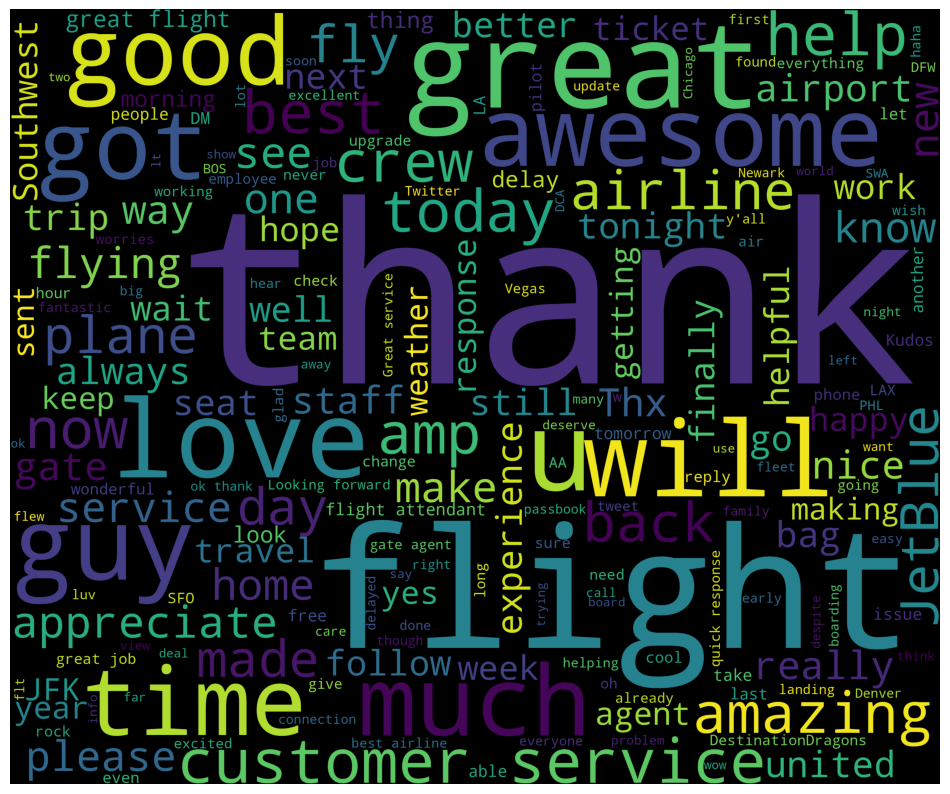

In [66]:
new_df = data[data["airline_sentiment"] == "positive"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Wordcloud for Negative Reasons**

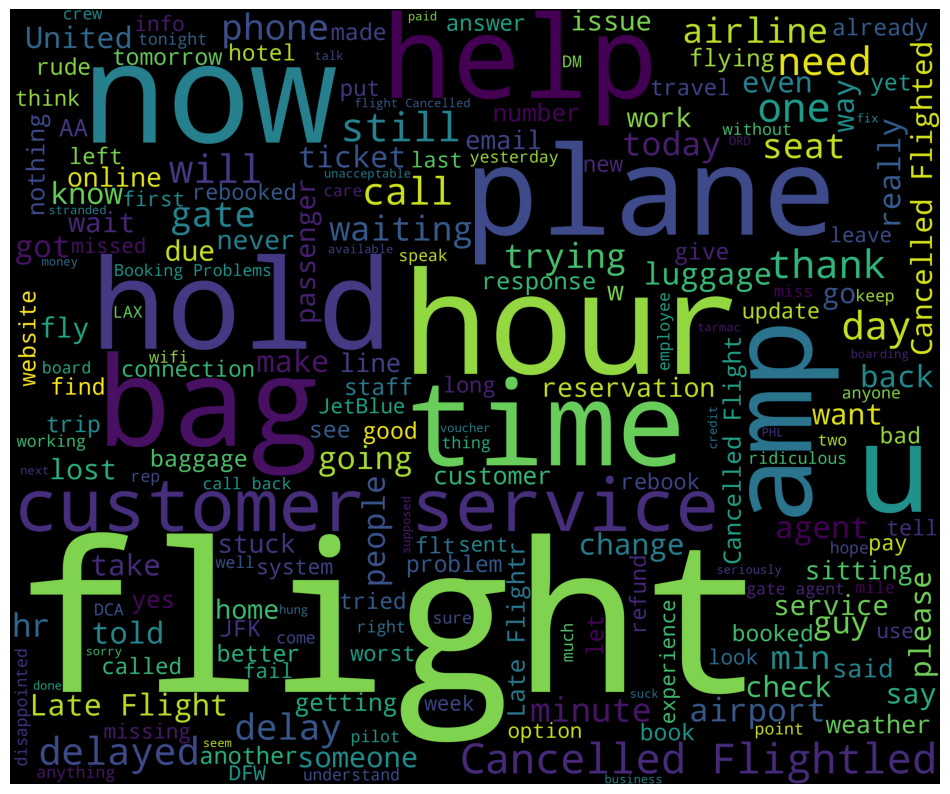

In [68]:
new_df = data[data["airline_sentiment"] == "negative"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [69]:
data.drop(data.loc[data["airline_sentiment"] == "neutral"].index, inplace = True)

# Data Scaling

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data["airline_sentiment"])
data["airline_sentiment_Encoded"] = le.transform(data["airline_sentiment"])
data.head()

,airline_sentiment,text,airline_sentiment_Encoded
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [71]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ", tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join( meaningful_words ))

In [73]:
nltk.download("stopwords")
data["clean_tweet"] = data["text"].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11510 entries, 1 to 14638
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   airline_sentiment          11510 non-null  object
 1   text                       11510 non-null  object
 2   airline_sentiment_Encoded  11510 non-null  int64 
 3   clean_tweet                11510 non-null  object
dtypes: int64(1), object(3)
memory usage: 449.6+ KB


# Defining X and y

In [76]:
X = data["clean_tweet"]
y = data["airline_sentiment"]

In [77]:
print(X.shape, y.shape)

(11510,) (11510,)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [79]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8632,) (2878,) (8632,) (2878,)


In [80]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [81]:
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

# Tuning

In [82]:
vect_tunned = CountVectorizer(stop_words = "english", ngram_range = (1, 2), min_df = 0.1, max_df = 0.7, max_features = 100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

# Model Building

In [83]:
from sklearn.svm import SVC
model = SVC(kernel = "linear", random_state = 10)
model.fit(X_train_dtm, y_train)
pred = model.predict(X_test_dtm)

In [84]:
print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)

Accuracy Score:  90.7574704656011


In [85]:
print("Confusion Matrix\n\n", confusion_matrix(y_test, pred))

Confusion Matrix

 [[2179  122]
 [ 144  433]]


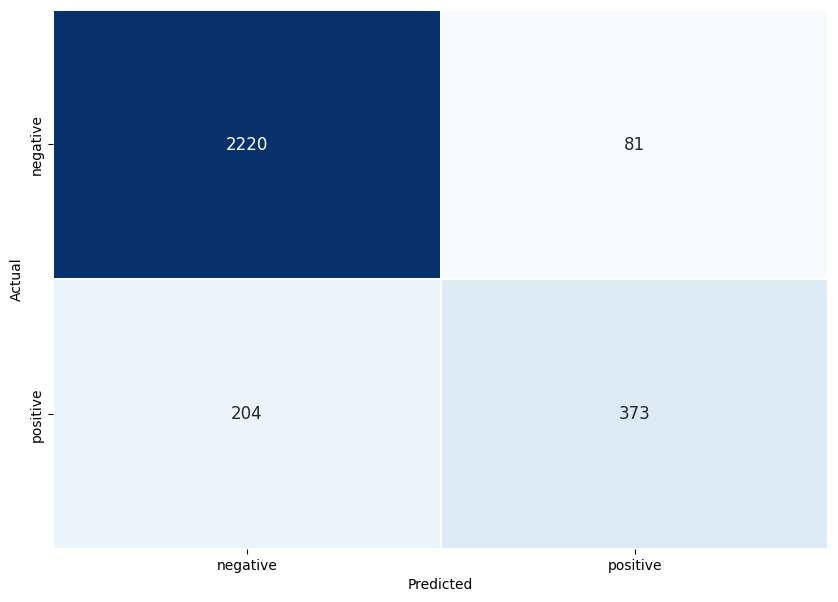

In [107]:
# Visualizing the confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=le.classes_, index=le.classes_)
plt.rcParams['figure.figsize'] = [10, 7]
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.1, annot_kws={'size': 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.94      0.95      0.94      2301
    positive       0.78      0.75      0.77       577

    accuracy                           0.91      2878
   macro avg       0.86      0.85      0.85      2878
weighted avg       0.91      0.91      0.91      2878



# Conclusions
**As we you can see above we have plotted the confusion matrix for predicted sentiments and actual sentiments (negative and positive)**

**SVM Classifier gives us the best accuracy score i.e 91% precision scores according to the classification report**

**The confusion matrix shows the TP,TN,FP,FN for sentiments(negative, positive).**

# Decision Tree Classifier

In [119]:
 from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

In [120]:
# Splitting the data into features (X) and target variable (y)
X = data["clean_tweet"]
y = data["airline_sentiment_Encoded"]

In [121]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Vectorizing the text data
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [123]:
# Initializing and training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train_dtm, y_train)

DecisionTreeClassifier(random_state=10)

In [125]:
# Predicting on the test set
pred = dt_model.predict(X_test_dtm)

In [126]:
# Evaluating the model
accuracy = accuracy_score(y_test, pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 86.84%


In [127]:
# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1699  145]
 [ 158  300]]


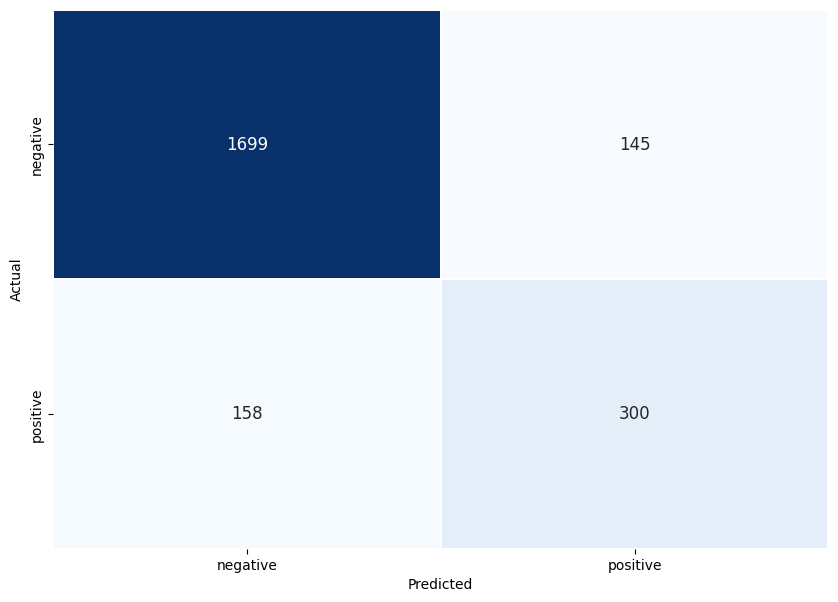

In [128]:
# Visualizing the confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=le.classes_, index=le.classes_)
plt.rcParams['figure.figsize'] = [10, 7]
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.1, annot_kws={'size': 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [129]:
# Displaying the classification report
report = classification_report(y_test, pred, target_names=le.classes_)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.92      0.92      1844
    positive       0.67      0.66      0.66       458

    accuracy                           0.87      2302
   macro avg       0.79      0.79      0.79      2302
weighted avg       0.87      0.87      0.87      2302



# Conclusion:

**The Decision Tree Classifier exhibits a reasonable overall performance with an accuracy of** 87%.** This suggests that the model effectively predicts the correct class for a majority of instances based on the given features.**

# Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [95]:
# Initialize Random Forest model
model = RandomForestClassifier(random_state=10)
model.fit(X_train_dtm, y_train)
pred = model.predict(X_test_dtm)

In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

In [96]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2220   81]
 [ 204  373]]


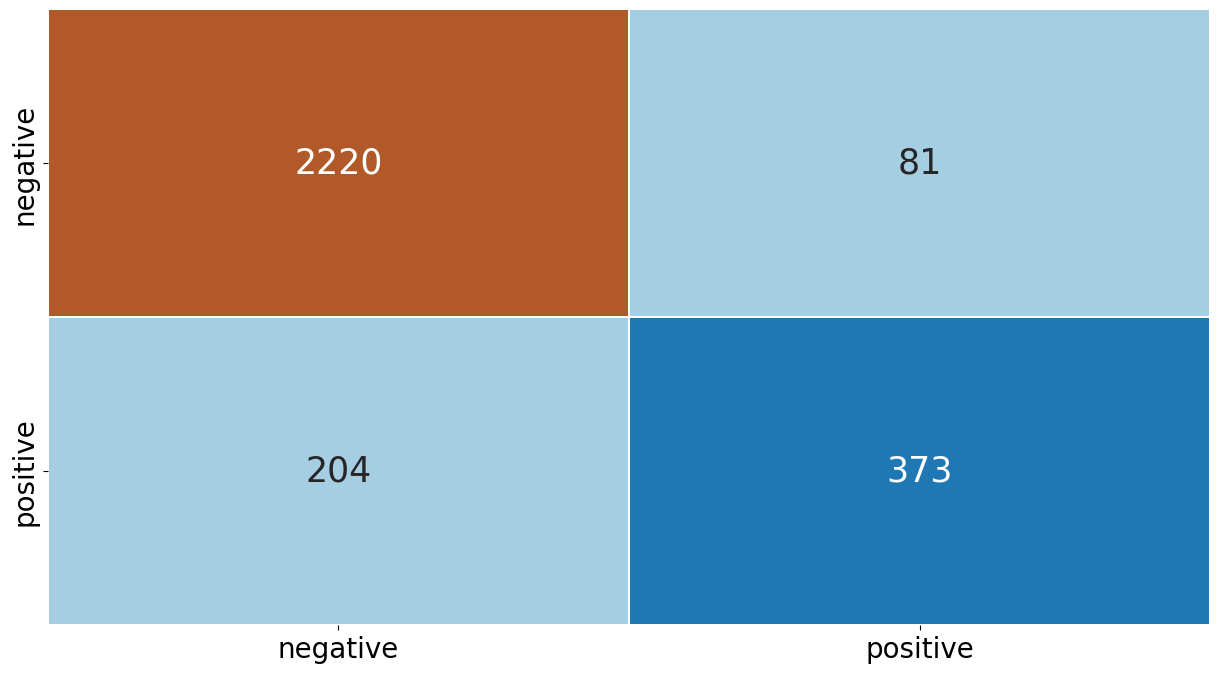

In [97]:
# Visualize confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=model.classes_, index=model.classes_)
plt.rcParams['figure.figsize'] = [15, 8]
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Paired', cbar=False, linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [98]:
# Display classification report
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.96      0.94      2301
    positive       0.82      0.65      0.72       577

    accuracy                           0.90      2878
   macro avg       0.87      0.81      0.83      2878
weighted avg       0.90      0.90      0.90      2878



# Conclusion:

**The Random Forest Classifier demonstrates strong overall accuracy, achieving a score of 90%. This indicates the model's ability to correctly classify instances into their respective classes based on the given features.**


**While the model performs well in identifying the "negative" class with high precision and recall (0.92 and 0.96, respectively), it faces challenges in accurately classifying the "positive" class, showing lower precision (0.82) and recall (0.65). This suggests potential areas for improvement, particularly in capturing positive instances.**


# K-Nearest-Neighbors(KNN)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

In [110]:

# Splitting the data into features (X) and target variable (y)
X = data["clean_tweet"]
y = data["airline_sentiment_Encoded"]

In [111]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Vectorizing the text data
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [113]:
# Initializing and training the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_dtm, y_train)

KNeighborsClassifier()

In [114]:
# Predicting on the test set
pred = knn_model.predict(X_test_dtm)

In [115]:
# Evaluating the model
accuracy = accuracy_score(y_test, pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))


Accuracy Score: 75.41%


In [116]:
# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1377  467]
 [  99  359]]


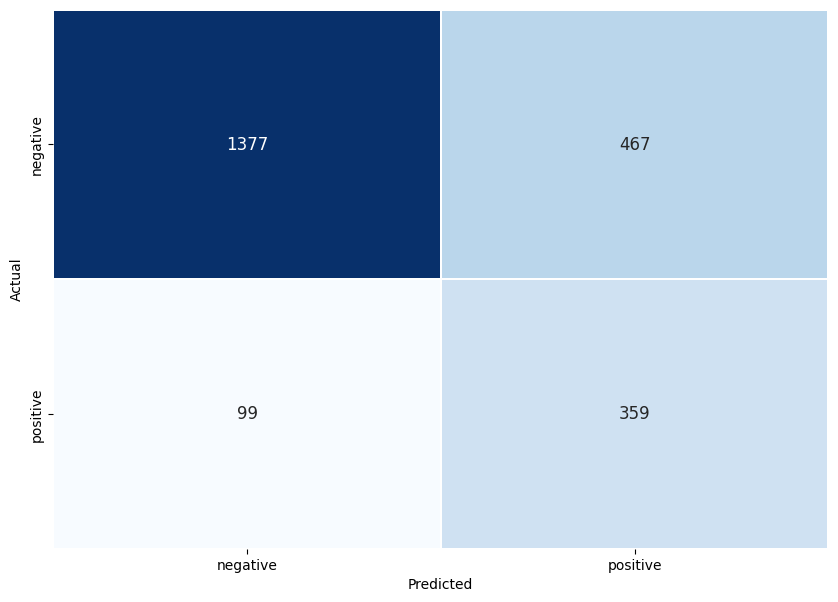

In [117]:
# Visualizing the confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=le.classes_, index=le.classes_)
plt.rcParams['figure.figsize'] = [10, 7]
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.1, annot_kws={'size': 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [118]:
# Displaying the classification report
report = classification_report(y_test, pred, target_names=le.classes_)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.75      0.83      1844
    positive       0.43      0.78      0.56       458

    accuracy                           0.75      2302
   macro avg       0.68      0.77      0.69      2302
weighted avg       0.83      0.75      0.78      2302



# Naive Bayes Classifier

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

In [131]:
# Splitting the data into features (X) and target variable (y)
X = data["clean_tweet"]
y = data["airline_sentiment_Encoded"]

In [132]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Vectorizing the text data
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [134]:
# Initializing and training the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_dtm, y_train)

MultinomialNB()

In [135]:
# Predicting on the test set
pred_nb = nb_model.predict(X_test_dtm)

In [136]:
# Evaluating the model
accuracy_nb = accuracy_score(y_test, pred_nb)
print("Naive Bayes - Accuracy Score: {:.2f}%".format(accuracy_nb * 100))

Naive Bayes - Accuracy Score: 91.88%


In [137]:
# Displaying the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, pred_nb)
print("Naive Bayes - Confusion Matrix:\n", conf_matrix_nb)

Naive Bayes - Confusion Matrix:
 [[1810   34]
 [ 153  305]]


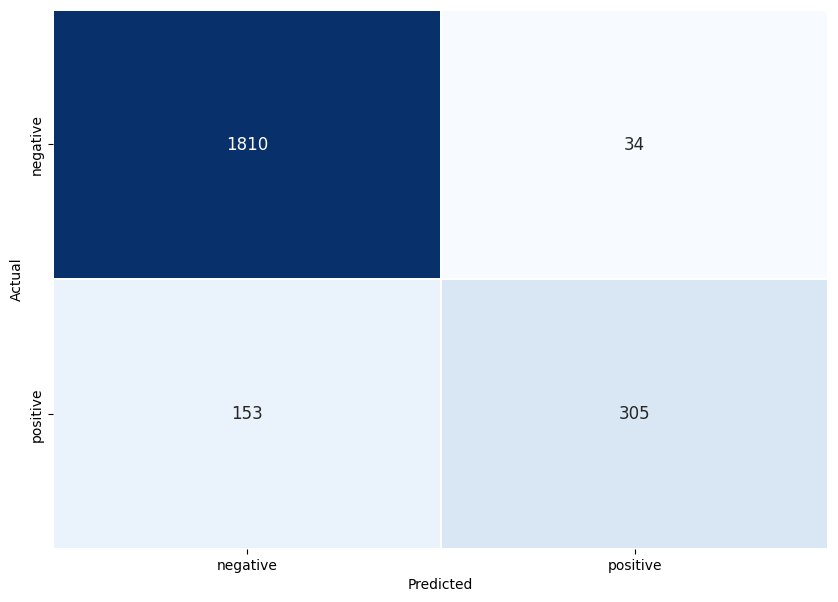

In [138]:
# Visualizing the confusion matrix using a heatmap
conf_matrix_df_nb = pd.DataFrame(data=conf_matrix_nb, columns=le.classes_, index=le.classes_)
plt.rcParams['figure.figsize'] = [10, 7]
sns.heatmap(conf_matrix_df_nb, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.1, annot_kws={'size': 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [139]:
# Displaying the classification report
report_nb = classification_report(y_test, pred_nb, target_names=le.classes_)
print("Naive Bayes - Classification Report:\n", report_nb)

Naive Bayes - Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.98      0.95      1844
    positive       0.90      0.67      0.77       458

    accuracy                           0.92      2302
   macro avg       0.91      0.82      0.86      2302
weighted avg       0.92      0.92      0.91      2302



# Conclusion:

The **Naive Bayes** Classifier demonstrates strong overall accuracy as compared to other ML models, achieving an accuracy score of **92%**. This indicates the model's ability to correctly classify instances into their respective classes based on the given features.

The classifier performs exceptionally well in identifying the "negative" class, with high precision (0.92) and recall (0.98). However, there is room for improvement in classifying the "positive" class, as reflected by a slightly lower precision (0.90) and recall (0.67).
This suggests potential areas for fine-tuning, particularly in capturing positive instances.

The macro and weighted average F1-scores are both 0.86, indicating a balanced performance in terms of precision and recall across classes. The model provides a robust trade-off between precision and recall, offering a comprehensive evaluation of its effectiveness.